## Machine Learning

### Unsupervised Learning
 - PCA and dimensionality reduction
 - K-means and classification

### Part one: 2D visualization friendly example with linear algebra refreshment

**What is PCA?**

Principal component analysis (PCA) is a linear dimensionality reduction technique with applications in exploratory data analysis, visualization and data preprocessing.

The data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified. --[Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

For visualization and intuition, let's first look at an example of 2D variable. I have five samples:

$\mathscr D={(2.1,3.5),(2.7,3.9),(3.0,4.1),(3.4,4.4),(3.9,4.7)}$ denoted as $D_i(\vec x_i)$ for each point, where $i=1,2,3,4,5$. What do they look like?

In [1]:
import numpy as np
x = np.array([[2.1, 3.5], [2.7, 4.0], [3.0,3.9], [3.4,4.5],[3.9,4.7]])

Text(0.5, 1.0, 'Five sample points from a 2D random variable')

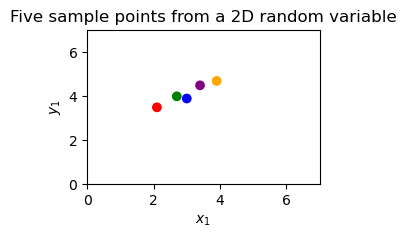

In [2]:
import matplotlib.pylab as plt
plt.figure(figsize=(3, 2)) 
x1 = x[:, 0] # the first dimension
x2 = x[:, 1] # the second dimension

colors = ['red', 'green', 'blue', 'purple', 'orange'] # assign different colors to different points
plt.scatter(x1, x2, c=colors)

plt.xlim(0,7)
plt.ylim(0,7)
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.title('Five sample points from a 2D random variable')

Let's calculate the covariance matrix

\begin{bmatrix}
    \sigma^2_x & \sigma^2_{xy} \\
    \sigma^2_{yx} & \sigma^2_{y} \\
\end{bmatrix}

where the variances $\sigma^2_x=\displaystyle\sum_{i=1}^N\frac{1}{N-1}(x_i-\bar x)^2$, $\sigma^2_y=\displaystyle\sum_{i=1}^N\frac{1}{N-1}(y_i-\bar y)^2$, and the [covariances](https://en.wikipedia.org/wiki/Covariance) $\sigma^2_{xy}=\sigma^2_{yx}=\displaystyle\sum_{i=1}^N\frac{1}{N-1}(x_i-\bar x)(y_i-\bar y)$, in short, to describe how two dimensions are related with each other.

You can definitely program to calculate from definitions, but here I'll use the package from numpy,

In [3]:
Sigma = np.cov(x, rowvar=False) # rowvar=False means in array x, every column is a 2D variable, every row is a dimension
print(Sigma)

[[0.467 0.317]
 [0.317 0.232]]


By definition, the covariance matrix is a positive semi-definite real symmetric matrix, so that we can do **orthogonal diagonalization**. You can definitely diagnolize the covariance matrix by the technique from Linear Algebra, but here I'll use the package trom numpy,

In [5]:
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)

# sort the eigenvalues from large to small. to reduce dimensionality, we will throw away the dimensions with smallest eignevalues
eigenvalues = np.flipud(eigenvalues)
eigenvectors = np.flipud(eigenvectors.T).T

print(eigenvalues)
print(eigenvectors)
P = eigenvectors
Sigma_prime = P.T @ Sigma @ P
print(Sigma_prime)

[0.68757581 0.01142419]
[[-0.82083957  0.57115883]
 [-0.57115883 -0.82083957]]
[[ 6.87575805e-01 -5.55111512e-17]
 [-3.81639165e-17  1.14241949e-02]]


Result:

<table style="border-collapse: collapse; border: none;">
    <tr>
        <td style="border: none;">\[ \Sigma = \begin{bmatrix} \sigma^2_x & \sigma^2_{xy} \\ \sigma^2_{yx} & \sigma^2_{y} \\ \end{bmatrix} = \begin{bmatrix} 0.467 & 0.317 \\ 0.317 & 0.232 \\ \end{bmatrix} \]</td>
        <td style="border: none; padding: 0 10px;">\[ P^T \Sigma P = I \]</td>
        <td style="border: none; padding: 0 10px;">\[ P = \begin{bmatrix} -0.821 & 0.571 \\ -0.571 & -0.821 \end{bmatrix} \]</td>
        <td style="border: none;">\[ \Sigma' = P^T \Sigma P = \begin{bmatrix} 0.68 & 0 \\ 0 & 0.0114 \end{bmatrix} = \begin{bmatrix} \sigma^2_{x'} & \sigma^2_{x'y'} \\ \sigma^2_{y'x'} & \sigma^2_{y'} \\ \end{bmatrix} \]</td>
    </tr>
</table>

Now we've diagonalised the covariance matrix. It corresponds to a linear transformation of the 2 dimensions of the random variables that makes the covariances zero. So what do the points look like after linear transformation?

Text(0.5, 1.0, 'Five transformed sample points from a 2D random variable')

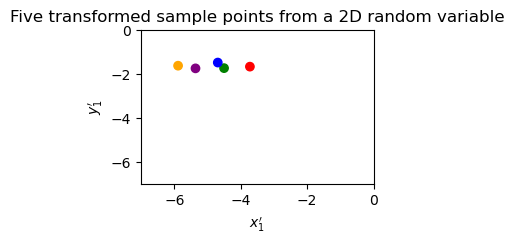

In [6]:
x_prime = x @ P # pls recall what you've learned in linear algebra; after this transformation, the covariance between the two new dimensions will be zero!
plt.figure(figsize=(3, 2)) 
x1_prime = x_prime[:, 0] # the first dimension
x2_prime = x_prime[:, 1] # the second dimension

colors = ['red', 'green', 'blue', 'purple', 'orange'] # assign different colors to different points
plt.scatter(x1_prime, x2_prime, c=colors)

plt.xlim(-7,0)
plt.ylim(-7,0)
plt.xlabel('$x^\prime_1$')
plt.ylabel('$y^\prime_1$')
plt.title('Five transformed sample points from a 2D random variable')

$x'_1$ is the axis with the large eigenvalue of the covariance matrix, and $y'_1$ is the axis with the small eigenvalue of the covariance matrix. 

In experiments, especially biological experiments, we don't know what exactly our high dimensional data tell us *a priori*. Ideally, we think the dimension with the largest differences helps us to distinguish data, while the dimension with the smallest difference comes from measuring noise. 

There might also be strong correlations between the dimensions of your original data points. Imaging the length of a worm species is the best criterion to tell us about their ages. The width of the worm is *nearly proportional* to the length. You want to infer the ages of a population of worms, and you measure the length and the width. You can safely throw away the width data - dimensionality reduction.

Now, if linear transformation between the dimensions is allowed, you are asked to reduce the dimension to 1D while achieving the goal of **distinguishing the samples with the largest difference**. How should you transform the two dimensions? Answer: you use the $P$ to transform between two dimensions and use $x_1'$ axis to represent your sample data points!

### Part two: K-means clustering under 2D visual friendly example

[k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering)

Let's continue with the worms. Now you have a population of adult worms of three different species ('adult' means you don't need to think about the 'age' within species). The three species are distinguishable by their size (length and width). Species A: long and wide; B: long and narrow; C: short and narrow. Collecting your measured data, 

In [7]:
x_A = np.array([[8.1, 6.5], [8.2, 6.4], [8.0, 6.7], [8.4 ,6.5]])
x_B = np.array([[8.2, 4.3], [8.0, 4.1], [7.9, 4.2], [8.6 ,4.5], [8.8, 4.5]])
x_C = np.array([[6.3, 4.3], [5.9, 3.9], [6.4, 4.3]])

Text(0.5, 1.0, 'Three species of worms')

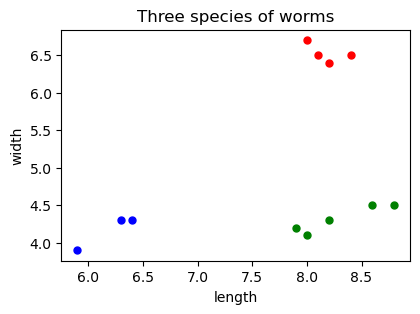

In [8]:
plt.figure(figsize=(4.5, 3)) 

plt.plot(x_A[:, 0], x_A[:, 1], '.', color='red', markersize=10, label='Species A')
plt.plot(x_B[:, 0], x_B[:, 1], '.', color='green', markersize=10, label='Species B')
plt.plot(x_C[:, 0], x_C[:, 1], '.', color='blue', markersize=10, label='Species C')

plt.xlabel('length')
plt.ylabel('width')
plt.title('Three species of worms')

Of course, you have no problem distinguishing the three species in 2D case, but in research, we deal with high dimensional data and cannot 'see' them! Now we pretend we can't see and need an algorithm to help us classify the data into three species. OK, now we only have the mixed data and embark on the task of classification.

Text(0.5, 1.0, 'Three species of worms')

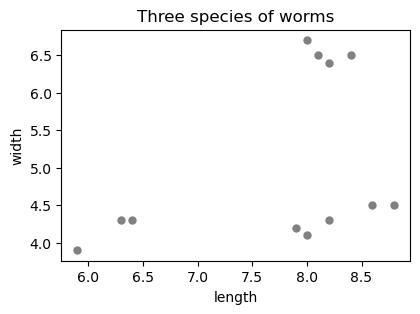

In [9]:
x_t = np.concatenate((x_A, x_B, x_C), axis=0)

plt.figure(figsize=(4.5, 3)) 
plt.plot(x_t[:, 0], x_t[:, 1], '.', markersize=10, color='grey')
plt.xlabel('length')
plt.ylabel('width')
plt.title('Three species of worms')

**Procedures**

1. **Randomly** pick three data points (since we want three catagories) as **reference points** and give them labels '1,2,3' and names 'mu_1, mu_2, mu_3', and assign each data point to the nearest reference point. Here, I pick [7.9, 4.2], [8.6 ,4.5], [8.8, 4.5].

Text(0.5, 1.0, 'Three species of worms')

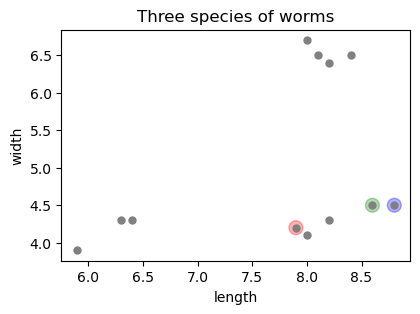

In [10]:
mu = x_t[[6, 7, 8], :]

plt.figure(figsize=(4.5, 3)) 
plt.plot(x_t[:, 0], x_t[:, 1], '.', markersize=10, color='grey')
colors = ['red', 'green', 'blue'] # assign different colors to different points
plt.scatter(mu[:, 0], mu[:, 1], c=colors, s=100, marker='o', edgecolors=colors, alpha=0.3)
plt.xlabel('length')
plt.ylabel('width')
plt.title('Three species of worms')

2. Assign each point to the closest reference point by giving it label '1,2,3'.

In [11]:
cata = 3
labels = np.zeros(x_t.shape[0]) # the list to store the label of each point

for i in range (x_t.shape[0]): # enumerate the data points
    d = np.zeros(cata) # an array to store the distances to three reference points
    for j in range (cata):
        d[j] = (x_t[i][0]-mu[j][0])**2 + (x_t[i][1]-mu[j][1])**2
    min_index = np.argmin(d)
    labels[i] = min_index

In [12]:
print(labels)

cata_0 = x_t[labels == 0]
cata_1 = x_t[labels == 1]
cata_2 = x_t[labels == 2]

[1. 1. 1. 1. 0. 0. 0. 1. 2. 0. 0. 0.]


Text(0.5, 1.0, 'Three species of worms, after one iteration')

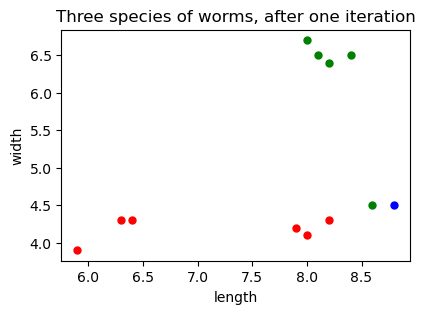

In [13]:
plt.figure(figsize=(4.5, 3)) 

plt.plot(cata_0[:, 0], cata_0[:, 1], '.', color='red', markersize=10, label='Species A')
plt.plot(cata_1[:, 0], cata_1[:, 1], '.', color='green', markersize=10, label='Species B')
plt.plot(cata_2[:, 0], cata_2[:, 1], '.', color='blue', markersize=10, label='Species C')

plt.xlabel('length')
plt.ylabel('width')
plt.title('Three species of worms, after one iteration')

This is the classification after one iteration. 

3. **Update each reference point** with the mean of each category. Redo step 2, and record the sum of the distances between each data point and the reference point within a category, stop iteration when the three sum values do not change any more!

Below are the updated reference points,

In [14]:
mu[0] = np.mean(cata_0, axis=0)
mu[1] = np.mean(cata_1, axis=0)
mu[2] = np.mean(cata_2, axis=0)

Text(0.5, 1.0, 'Three species of worms, after one iteration')

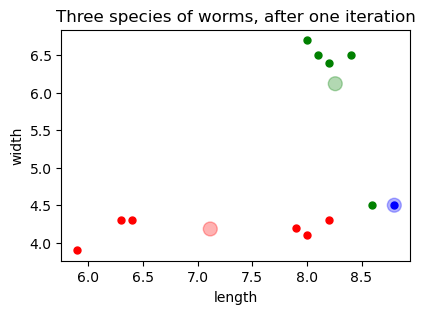

In [15]:
plt.figure(figsize=(4.5, 3)) 

# plotting the data points
plt.plot(cata_0[:, 0], cata_0[:, 1], '.', color='red', markersize=10, label='Species A')
plt.plot(cata_1[:, 0], cata_1[:, 1], '.', color='green', markersize=10, label='Species B')
plt.plot(cata_2[:, 0], cata_2[:, 1], '.', color='blue', markersize=10, label='Species C')

# plotting the reference point
colors = ['red', 'green', 'blue'] # assign different colors to different points
plt.scatter(mu[:, 0], mu[:, 1], c=colors, s=100, marker='o', edgecolors=colors, alpha=0.3)

plt.xlabel('length')
plt.ylabel('width')
plt.title('Three species of worms, after one iteration')

After the second iteration,

Text(0.5, 1.0, 'Three species of worms, after two interations')

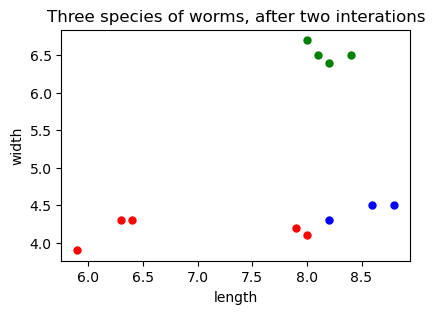

In [17]:
cata = 3
label = np.zeros(x_t.shape[0]) # the list to store the label of each point

for i in range (x_t.shape[0]): # enumerate the data points
    d = np.zeros(cata) # an array to store the distances to three reference points
    for j in range (cata):
        d[j] = (x_t[i][0]-mu[j][0])**2 + (x_t[i][1]-mu[j][1])**2
    min_index = np.argmin(d)
    labels[i] = min_index

cata_0 = x_t[labels == 0]
cata_1 = x_t[labels == 1]
cata_2 = x_t[labels == 2]

plt.figure(figsize=(4.5, 3)) 

plt.plot(cata_0[:, 0], cata_0[:, 1], '.', color='red', markersize=10, label='Species A')
plt.plot(cata_1[:, 0], cata_1[:, 1], '.', color='green', markersize=10, label='Species B')
plt.plot(cata_2[:, 0], cata_2[:, 1], '.', color='blue', markersize=10, label='Species C')

plt.xlabel('length')
plt.ylabel('width')
plt.title('Three species of worms, after two interations')

You can definitely write your own complete K-means algorithm, but it is not necessary (it was my homework for the grad course). Use the packages for machine learning to see the final result.

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Three species of worms, final results')

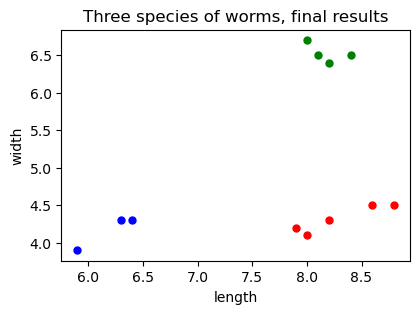

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42) # random_state: the selection of the initial reference points
kmeans.fit(x_t)

labels = kmeans.labels_

cata_0 = x_t[labels == 0]
cata_1 = x_t[labels == 1]
cata_2 = x_t[labels == 2]

plt.figure(figsize=(4.5, 3)) 

plt.plot(cata_0[:, 0], cata_0[:, 1], '.', color='red', markersize=10, label='Species A')
plt.plot(cata_1[:, 0], cata_1[:, 1], '.', color='green', markersize=10, label='Species B')
plt.plot(cata_2[:, 0], cata_2[:, 1], '.', color='blue', markersize=10, label='Species C')

plt.xlabel('length')
plt.ylabel('width')
plt.title('Three species of worms, final results')